In [2]:
import numpy as np
import scipy.sparse as sparse

# Plant dynamic model matrices
A = np.zeros((6,6))
B = np.identity(6)
nx,nu = A.shape[0], B.shape[1]

# MPC settings
# Prediction horizon
npred = 4
# Weighting matrices
Q = (40/npred)*sparse.block_diag((1.,1.,1.,1.,1.,1.))
R = (1/npred)*sparse.block_diag((1.,1.,1.,1.,1.,1.))
# Controller output constraints
dumin = -0.25*np.array([1.,1.,1.,1.,1.,1.])
dumax = 0.25*np.array([1.,1.,1.,1.,1.,1.])
umin = -2*np.array([1.,1.,1.,1.,1.,1.])
umax = 2*np.array([1.,1.,1.,1.,1.,1.])

In [4]:
import pickle
A = np.zeros((42,42))
B = np.identity(42)
npred = 4
# Weighting matrices
Q = (40/npred)*sparse.block_diag([1]*42)
R = (1/npred)*sparse.block_diag([1]*42)

w = np.ones(42)
dumin = -0.25*w
dumax = 0.25*w
umin = -2*w
umax = 2*w
data = {'MPC':{'A':A,'B':B,'Q':Q,'R':R,
              'npred':npred,
               'dumin':dumin,'dumax':dumax,
               'umin':umin,'umax':umax}}
with open('MPC.pickle','wb') as f:
    pickle.dump(data,f)

In [3]:
ls

AGWS/   driver.py    M1M2/  mpc_driver.py        MPC.pickle  __pycache__/
dos.py  __init__.py  M2TT/  mpcDriverTest.ipynb  NGAO/       SPEED/


In [9]:
from mpc_driver import MPC

In [36]:
import mpc_driver, driver

In [31]:
sys = getattr(mpc_driver,'MPC')()

In [37]:
sys = getattr(driver,'System')()

Exception: System should be of the type 'transfer function' or 'zeros poles gains'

In [34]:
sys.logger

<Logger MPC (INFO)>

In [22]:
import mpc_driver as mpcCtrl

# Initialize MPC object
AcOshC = mpcCtrl.MPC(tau=None,tag='MPC',logs=None,delay=0,sampling_rate=1)
AcOshC.init(A,B,Q,R,npred,dumin,dumax,umin,umax)
AcOshC.start()

# Simulation initial conditions
np.random.seed(19680801)
# State and output
x = 2*np.random.uniform(-1,1,nx)
u = np.zeros(nu)

# Output references
xr = 1*np.ones(nx*npred)
#np.kron(np.ones((npred)),np.array([1,0.6,0.2,-0.2,-0.6,-1]))#


# Closed-loop simulation
nsim = 12
udt, xdt = np.zeros((nu,nsim)), np.zeros((nx,nsim)) 

for i in range(nsim):
    
    # Save u,y
    udt[:,i] = u
    xdt[:,i] = x
    
    AcOshC.update(x,xr,step=1)
    u = AcOshC.output()
    
    # Apply first control input to the plant
    w = -0.4*np.random.uniform(0.95,1.05,A.shape[0])
    x = np.dot(A,x) + np.dot(1*B,u) + w
    
# Terminate driver
AcOshC.terminate()

-----------------------------------------------------------------
           OSQP v0.5.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2018
-----------------------------------------------------------------
problem:  variables n = 24, constraints m = 48
          nnz(P) + nnz(A) = 144
settings: linear system solver = qdldl,
          eps_abs = 1.0e-03, eps_rel = 1.0e-03,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 4000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off



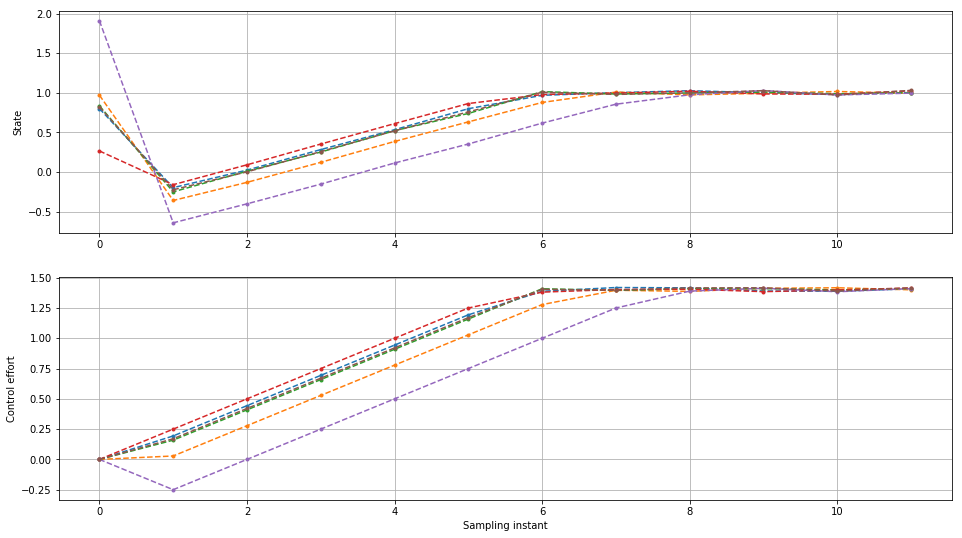

In [24]:
# Plot results
import matplotlib.pyplot as plt

kt = np.arange(0,nsim)

plt.figure(figsize=(16,9))
plt.subplot(211)
for k in range(nx):
    plt.plot(kt,xdt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('State')
    
plt.subplot(212)
for k in range(nu):
    plt.plot(kt,udt[k,:],'.--')
    plt.grid(True)
    plt.ylabel('Control effort')
    plt.xlabel('Sampling instant')

plt.show()